# Structure and Plot
A key goal of *Moviegoer* is understanding a film's structure. A movie can be divided into several types of units: acts, sequences, shots, but the most important is the **scene**. A scene is a self-contained container of action and dialogue, usually taking place at a single location, and involving one or more characters.

In this notebook, we'll take a look at some basic information about the film as a whole, then look at scenes we've found and what we can learn from their dialogue. Many of these analyses are image-based, and examples of illustrations are provided in the Readme in the root of this directory. It's strongly recommended to follow along with those illustrations.

In [1]:
import sys
sys.path.append('../unifying_features')
sys.path.append('../data_serialization')
from serialization_preprocessing_io import *
from time_reference_io import *
from film_details_io import *
from scene_identification_io import *
from scene_details_io import *
from character_identification_io import *
from character_details_io import *
nlp = spacy.load('en_core_web_sm')

C:\Users\lkrpan\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Baseline Film Information
First, we'll take a look at the drama *Lost in Translation* (2003). We can view some basic information about the film as a whole.

In [2]:
film = 'margaux'
display_film_baseline(film)

---------
Technical
---------
Aspect Ratio: 2.39
Average shot duration: 2.99
Average frame brightness: 44
Average frame contrast: 36

--------
Dialogue
--------
Spoken sentences per minute: 15
Words per sentence: 4.54

-------
Emotion
-------
Percentage of Upset facial expressions: 55%
Instances of laughter, per minute: 0.0
One in 108 words is a profanity.


*Lost in Translation* is a famously quiet movie. As a film about loneliness, it features many dialogue-free scenes of its characters wandering through Tokyo, trying to make sense of a foreign culture. The dialogue that does exist is sparse.

# Two-Character Dialogue Scenes
We've created an algorithm to automatically identify scenes, partitioning them with the identification of their first and last frame. For now, the algorithm specifically identifies two-character dialogue scenes. These types of scenes are the basic building blocks of cinema: two characters speaking to each other, with no distractions, purely advancing the plot.

In [3]:
srt_df, subtitle_df, sentence_df, vision_df, face_df = read_pickle(film)
scene_dictionaries = generate_scenes(vision_df, face_df, substantial_minimum=1, anchor_search=2)

## The A/B/A/B pattern
In modern film, two-character dialogue scenes follow a very distinct pattern. Character A speaks, then Character B, then back to A, then to B, etc. We cut back and forth between the two characters.

We look for these two Anchor shots, which are the shots of the two characters and form the A/B/A/B pattern. We can also identify Cutaway shots, which aren't part of the A/B/A/B pattern but are still part of the scene.

Let's take a look at the first scene the algorithm identified. This is the very first scene that our main characters, Charlotte and Bob, have a conversation. It doesn't take place until 31 minutes until the film — again, the film is sparse on dialogue.

In [9]:
scene_dictionaries
scene_dictionaries[1]

{'scene_id': 1,
 'first_frame': 1716,
 'last_frame': 1736,
 'scene_duration': 21,
 'left_anchor_shot_cluster': 16,
 'left_anchor_face_cluster': 6.0,
 'matching_left_face_clusters': [],
 'right_anchor_shot_cluster': 160,
 'right_anchor_face_cluster': 8.0,
 'matching_right_face_clusters': [18.0, 0.0],
 'cutaway_shot_clusters': []}

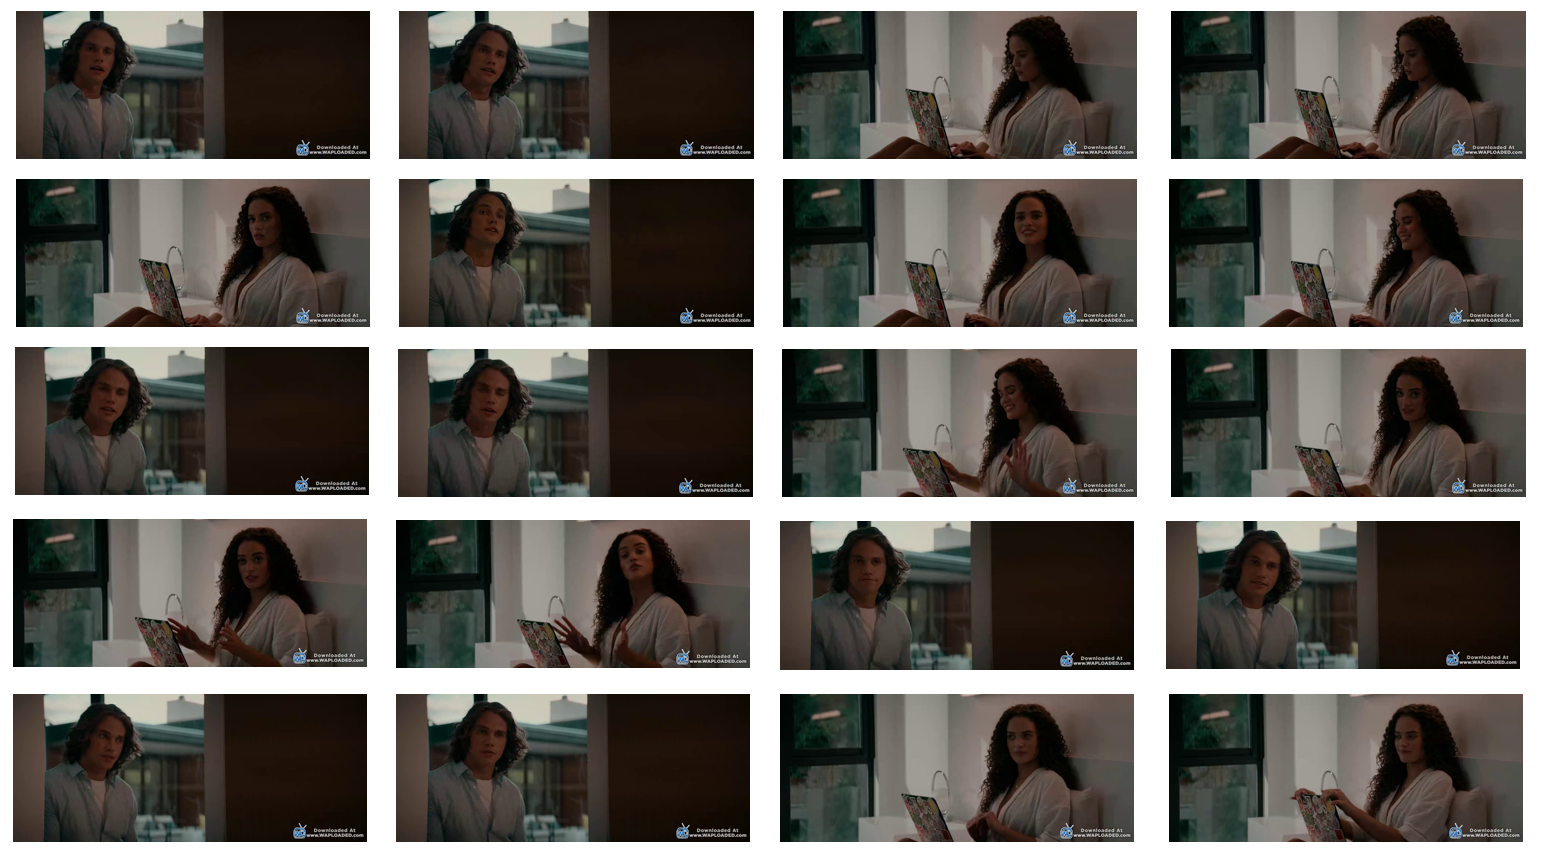

In this 2:34 scene, Bob and Charlotte have a conversation in the A/B/A/B format, so we're able to identify the first and last frames in which they speak. We can also discover some Cutaways, which are just two-shots of Bob and Charlotte sitting at the bar.

We can then turn to the dialogue to try and identify important phrases and bits of conversation. We extract possible important terms, as well as potentially important pieces of dialogue.

In [10]:
scene_dict = scene_dictionaries[1]
vision_scene_df, face_scene_df, subtitle_scene_df, sentence_scene_df = generate_scene_level_dfs(scene_dict, vision_df, face_df, subtitle_df, sentence_df)
display_scene_start_end(sentence_scene_df)

-------------------------------
Icebreaker (Conversation Start)
-------------------------------
Wow.
Love what you've done with the place.
You're not supposed to be thinking about finals on vacation.


-------------------------
Kicker (Conversation End)
-------------------------
Well, the rest of us are gonna go out in the pool.
Are you coming?
Yeah, okay.


In [11]:
display_scene_important_sentences(sentence_scene_df, nlp)

--------------------------------
Directed Questions and Responses
--------------------------------
Are you coming?
Yeah, okay.

-------------------------
First-Person Declarations
-------------------------

-----------------------
Second-Person Addresses
-----------------------
Love what you've done with the place.


In [12]:
display_scene_important_phrases(sentence_df, sentence_scene_df, nlp)

--------------------------------
Possible Important Terms, TF-IDF
--------------------------------
['finals', 'okay', 'vacation isn finals', 'coming yeah okay', 'place supposed']


-------------------------------------
Possible Important Terms, Noun Groups
-------------------------------------
['finals', 'the place', 'vacation', 'a personal project', 'the rest']


C:\Users\lkrpan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


The "Directed Questions" section is particularly informative here. This is the first scene where the characters speak, so they're getting to know each other by asking them personal questions.

Directed questions are specifically questions addressing the second-person "you", so they're generally more informative than any other types of questions. For example, "Is it cold out?" vs. "Are you bringing a jacket?": the second question invokes a more personal response.

## Emotional Analysis, at the Scene Level

With scenes identified, we can also look into the scene's conversation speed, as well as character facial expressions. This scene has Bob and Charlotte reconciling after a fight, and realizing their time together is coming to an end.

In [13]:
scene_dict = scene_dictionaries[1]
vision_scene_df, face_scene_df, subtitle_scene_df, sentence_scene_df = generate_scene_level_dfs(scene_dict, vision_df, face_df, subtitle_df, sentence_df)

In [14]:
cadence = get_scene_cadence(vision_scene_df, subtitle_scene_df)

This scene has a medium cadence, with a conversation speed of 23 sentences per minute.


Recall that when we looked at the film's baseline statistics and found that it had an average conversation speed of 15 sentences per minute. This scene is even slower, clocking in at a barren 8 sentences per minute. The emotional impact comes from the characters' facial features as they look at each other in silence.

Charlotte is sad about their impending departure, and her face is sad in almost 40% of her frames. Bob, played by the notoriously deadpan Bill Murray, has a neutral look on his face for the majority of the scene.

In [16]:
display_scene_emotions(scene_dict, face_df)

Left character, with face clusters [6.0] has the primary emotion: sad, in 45% of frames
Right character, with face clusters [8.0, 18.0, 0.0] has the primary emotion: sad, in 43% of frames


## Finding Drama: Scene vs. Film Attributes
Finally, we can take a look at a scene from *Plus One* (2019), a romantic comedy.

In [17]:
film = 'margaux'
display_film_baseline(film)

---------
Technical
---------
Aspect Ratio: 2.39
Average shot duration: 2.99
Average frame brightness: 44
Average frame contrast: 36

--------
Dialogue
--------
Spoken sentences per minute: 15
Words per sentence: 4.54

-------
Emotion
-------
Percentage of Upset facial expressions: 55%
Instances of laughter, per minute: 0.0
One in 108 words is a profanity.


Sharp dialogue is a staple of the romantic comedy ― *Plus One* more than doubles the amount of sentences per minute of *Lost in Translation*. As a more mainstream rom-con, it's shot more traditionally than *Lost in Translation*. We've identified 18 two-character dialogue scenes ― we'll take a look at the 17th scene.

In [22]:
srt_df, subtitle_df, sentence_df, vision_df, face_df = read_pickle(film)
scene_dictionaries = generate_scenes(vision_df, face_df, substantial_minimum=1, anchor_search=2)
scene_dict = scene_dictionaries[2]
vision_scene_df, face_scene_df, subtitle_scene_df, sentence_scene_df = generate_scene_level_dfs(scene_dict, vision_df, face_df, subtitle_df, sentence_df)
profanity_per_word = get_scene_ppw(sentence_scene_df)

One in 29 words is a profanity.


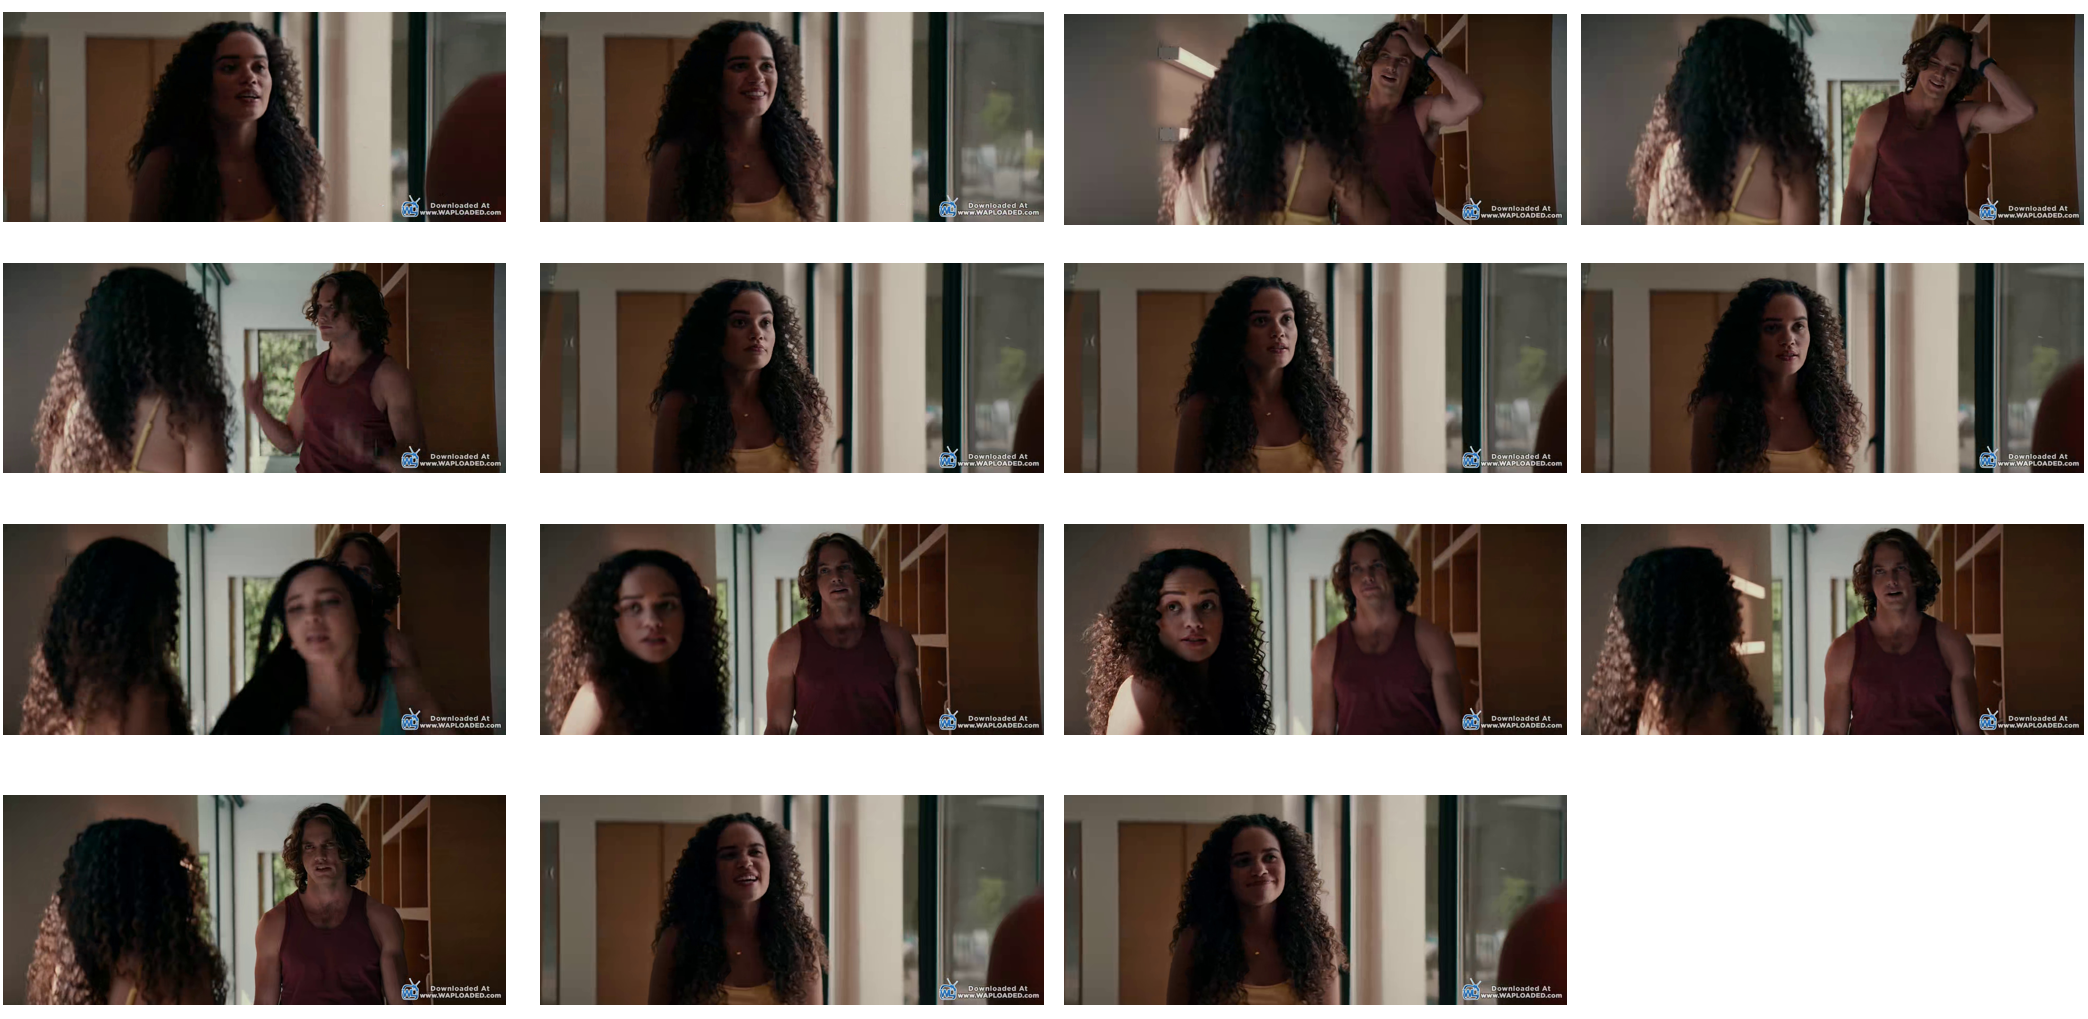

In [23]:
display_scene_important_sentences(sentence_scene_df, nlp)

--------------------------------
Directed Questions and Responses
--------------------------------
Um, how'd you sleep?
Um, not bad.

-------------------------
First-Person Declarations
-------------------------
I'm sorry.

-----------------------
Second-Person Addresses
-----------------------


This is a tense scene where the character of Ben pours his heart out for Alice. The scene contains double the amount of profanity as the film overall. We can pay special attention to scenes like these. Lots of profanity might indicate lots of drama (and emotional data!) like a fight or scene like this one. This applies for other scene/film attributes, not just profanity, so we should be comparing scenes to the film baseline.

Also of note, this scene contains a lot of First-Person Declarations which tell us a lot about the plot.

In [21]:
display_scene_emotions(scene_dict, face_df)

Left character, with face clusters [6.0] has the primary emotion: sad, in 45% of frames
Right character, with face clusters [8.0, 18.0, 0.0] has the primary emotion: sad, in 43% of frames
